In [19]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [20]:
ticker = 'GPRO'

In [21]:
data = pd.DataFrame()

In [22]:
data[ticker] = wb.DataReader(ticker, data_source='yahoo')['Adj Close']

In [23]:
log_returns = np.log(1 + data.pct_change())
log_returns.tail() 

,GPRO
Date,
2018-11-16,0.016439
2018-11-19,-0.021979
2018-11-20,-0.030078
2018-11-21,0.015152
2018-11-23,-0.036368


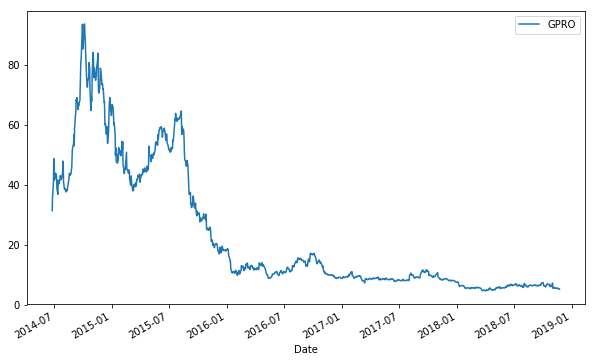

In [24]:
data.plot(figsize=(10, 6));

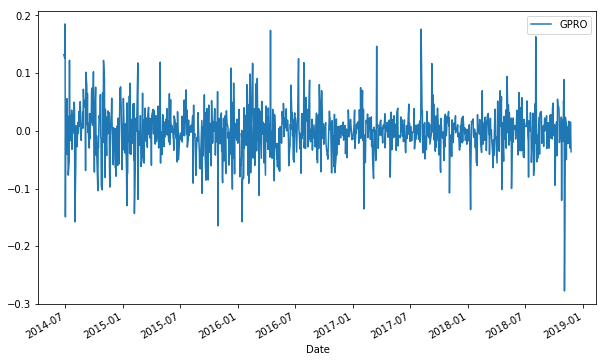

In [25]:
log_returns.plot(figsize = (10, 6))

In [26]:
u = log_returns.mean()
u

GPRO   -0.001628
dtype: float64

In [27]:
var = log_returns.var()
var

GPRO    0.001649
dtype: float64

In [28]:
drift = u- (0.5 * var)
drift

GPRO   -0.002452
dtype: float64

In [29]:
stdev = log_returns.std()
stdev

GPRO    0.040613
dtype: float64

In [30]:
type(drift)

pandas.core.series.Series

In [31]:
type(stdev)

pandas.core.series.Series

In [32]:
np.array(drift)

array([-0.00245223])

In [33]:
drift.values

array([-0.00245223])

In [34]:
drift.values

array([-0.00245223])

In [35]:
stdev.values

array([0.04061339])

In [36]:
norm.ppf(0.95)

1.6448536269514722

In [37]:
x = np.random.rand(10, 2)
x

array([[0.53094875, 0.53180234],
       [0.00139543, 0.47840183],
       [0.22600242, 0.40240308],
       [0.2703679 , 0.68615602],
       [0.10046654, 0.75173746],
       [0.92259164, 0.4696016 ],
       [0.66094779, 0.45969885],
       [0.86768089, 0.90857098],
       [0.40981144, 0.70441414],
       [0.03465637, 0.1739014 ]])

In [38]:
norm.ppf(x)

array([[ 0.07765498,  0.07980125],
       [-2.98988105, -0.05416505],
       [-0.75207686, -0.24713188],
       [-0.61170071,  0.48498363],
       [-1.27889771,  0.67996744],
       [ 1.42272212, -0.07627136],
       [ 0.41505121, -0.10119243],
       [ 1.11549533,  1.33200655],
       [-0.22803006,  0.53713884],
       [-1.81637584, -0.93885966]])

In [39]:
norm.ppf(np.random.rand(10, 2))

array([[ 0.89354037, -0.63375036],
       [-0.00785293,  1.5982227 ],
       [-0.98228251,  0.33838278],
       [ 2.38661436,  0.12712993],
       [ 0.29275497, -1.12656287],
       [-0.88323481, -0.83616866],
       [ 0.0796673 , -2.05306657],
       [-0.04264228, -1.90934339],
       [-0.82661629, -1.11653726],
       [-1.38850494, -0.43467361]])

In [40]:
Z = norm.ppf(np.random.rand(10, 2))
Z

array([[ 0.05717632,  0.4460664 ],
       [-0.83990147, -0.41917424],
       [ 0.53415098, -0.86507894],
       [-1.82308206, -1.14158538],
       [-0.41485321,  0.08166565],
       [-0.10877265,  1.04823893],
       [-0.96509198,  1.38874285],
       [ 1.20875037, -0.48378241],
       [ 0.51709561, -0.3048916 ],
       [-1.10325921, -1.50505957]])

In [41]:
t_intervals = 1000
iterations = 10

In [42]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [43]:
daily_returns

array([[0.94853257, 0.95318441, 0.95980622, ..., 1.04436555, 0.9555971 ,
        1.01175292],
       [0.96465773, 0.95529643, 0.98722711, ..., 1.00224583, 0.98030913,
        0.96791773],
       [1.03335118, 1.03437856, 0.93343522, ..., 0.96338593, 1.03593227,
        1.0117169 ],
       ...,
       [1.03514041, 1.01829465, 0.99710222, ..., 0.96778388, 0.91955016,
        1.01295675],
       [0.97001846, 1.0074436 , 1.04215165, ..., 1.02107846, 1.00711107,
        0.99369312],
       [1.01098494, 1.03247413, 0.97362961, ..., 0.99797473, 0.98085138,
        0.99268848]])

In [44]:
S0 = data.iloc[-1]
S0

GPRO    5.13
Name: 2018-11-23 00:00:00, dtype: float64

In [45]:
price_list = np.zeros_like(daily_returns)

In [46]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [48]:
price_list[0] = S0
price_list

array([[5.13000011, 5.13000011, 5.13000011, ..., 5.13000011, 5.13000011,
        5.13000011],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [49]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [50]:
price_list

array([[5.13000011, 5.13000011, 5.13000011, ..., 5.13000011, 5.13000011,
        5.13000011],
       [4.94869428, 4.90067077, 5.06447518, ..., 5.14152122, 5.02898593,
        4.96541808],
       [5.11373905, 5.06914877, 4.7273595 , ..., 4.9532692 , 5.20968881,
        5.02359739],
       ...,
       [0.22403344, 0.26976528, 0.51962594, ..., 0.08916462, 0.29173602,
        0.09571341],
       [0.21731658, 0.2717733 , 0.54152903, ..., 0.09104407, 0.29381057,
        0.09510976],
       [0.21970379, 0.2805989 , 0.5272487 , ..., 0.09085968, 0.28818451,
        0.09441436]])

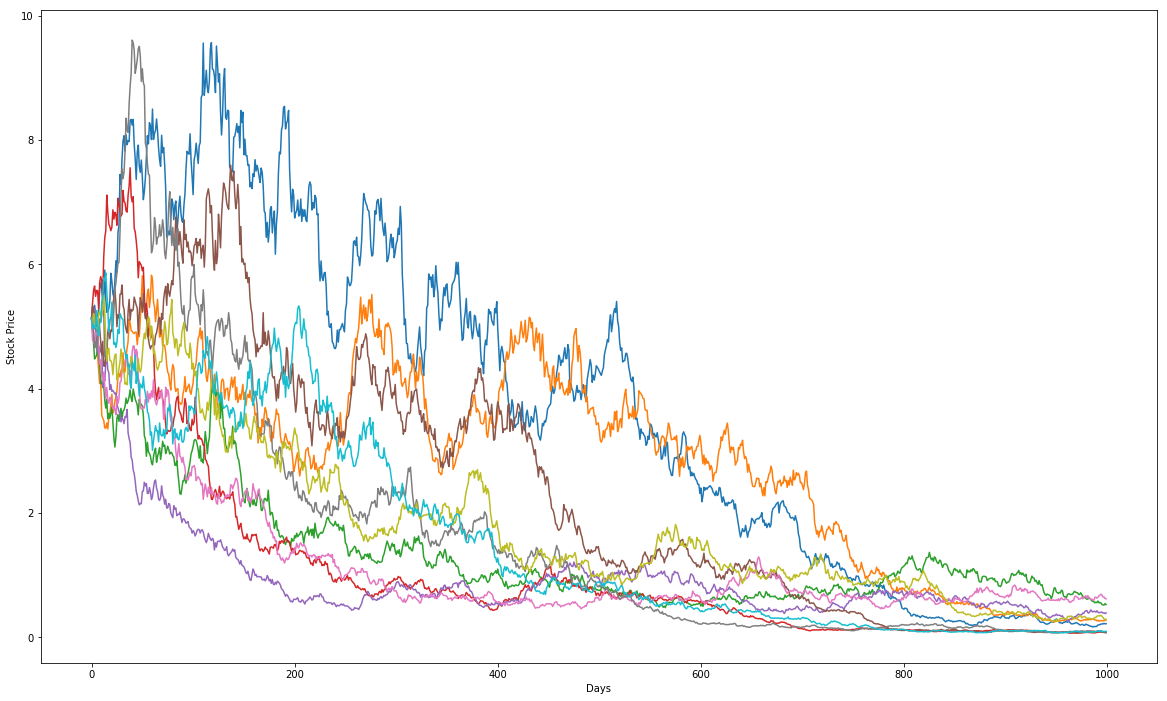

In [56]:
plt.figure(figsize=(20,12))
plt.ylabel('Stock Price')
plt.xlabel('Days')
plt.plot(price_list);